NEW FILE FOR THE CAR SALES

-------------------------------------------------------------------

This is a supervised learning problem. We have the output of each observation and we are going to predict this output and come up with the best estimations possible for each observation.

In [26]:
#Get path (independently from who is running the command)

import os
os.getcwd()

'c:\\Users\\Jaume\\Documents\\MDDB\\AI\\AI_Group11_Project\\AI_Group7_Assignment'

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import PredefinedSplit, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, precision_recall_curve
import matplotlib.pyplot as plt
from plotnine import *
import os
import datetime
import pickle
import json

**PHASE 0: READ AND CLEAN DATA**

In [28]:
os.listdir(os.path.join('..', 'car_prices')) # independent of the platform (unix, windows)

## We read the files
car_sales_data_path = os.path.join("..", "car_prices", "car_prices.csv")
df = pd.read_csv(car_sales_data_path, on_bad_lines= "skip")

In [29]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [30]:
# We are going to check if there are NaN values

# Count NaN values in each column
nan_counts = df.isna().sum()

# Display the count of NaN values
print("\nCount of NaN values in each column:")
print(nan_counts)

#We drop the NaN values

df = df.dropna()


Count of NaN values in each column:
year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64


In [31]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558805,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,3.9,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300,22800,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


**PHASE 1: DESCRIPTIVE ANALYSIS**

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472336 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472336 non-null  int64  
 1   make          472336 non-null  object 
 2   model         472336 non-null  object 
 3   trim          472336 non-null  object 
 4   body          472336 non-null  object 
 5   transmission  472336 non-null  object 
 6   vin           472336 non-null  object 
 7   state         472336 non-null  object 
 8   condition     472336 non-null  float64
 9   odometer      472336 non-null  float64
 10  color         472336 non-null  object 
 11  interior      472336 non-null  object 
 12  seller        472336 non-null  object 
 13  mmr           472336 non-null  int64  
 14  sellingprice  472336 non-null  int64  
 15  saledate      472336 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 61.3+ MB


In [33]:
df.isnull().sum().sort_values(ascending = False)


year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [34]:
numbers = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']
categories = ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']

In [35]:
df[numbers].describe()

,year,condition,odometer,mmr,sellingprice
count,472336.000000,472336.000000,472336.000000,472336.000000,472336.000000
mean,2010.211045,3.426576,66701.070003,13836.999773,13690.403670
std,3.822131,0.943659,51939.183430,9532.131753,9612.962279
min,1990.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,2.700000,28137.000000,7425.000000,7200.000000
50%,2012.000000,3.600000,51084.000000,12300.000000,12200.000000
75%,2013.000000,4.200000,96589.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


Key observations:

1. **Year, Condition, Odometer:**
   - No issues with the minimum and maximum values.
   - All values in these columns make sense and fall within reasonable ranges.

2. **Year, Condition, Odometer, MMR, Selling Price:**
   - There is a difference between the mean and median for Year, Condition, Odometer, MMR, and Selling Price.
   - This difference could indicate the presence of outliers in the data, skewing the mean away from the median.
   - Outliers can significantly impact statistical measures, so it's important to investigate and possibly handle them during data preprocessing.

3. **MMR Column:**
   - The minimum range value in the MMR column is quite far from the mean and median.
   - Further review during preprocessing is needed to understand the nature of these extreme values.
   - Outliers in MMR may be indicative of rare cases or errors in the data and might need special treatment (e.g., removal or transformation).

4. **Anomaly in Minimum Selling Price:**
   - There is an anomaly in the minimum selling price value, suspected to be unknown data.
   - The data is imputed with a value of 1, or it might represent instances where the car is sold as part of a company program (gift).
   - Imputation of missing or unknown values is a common preprocessing step, and using a value of 1 might be reasonable if it indicates a placeholder or default value.

**PHASE 2: DATA MODELLING**

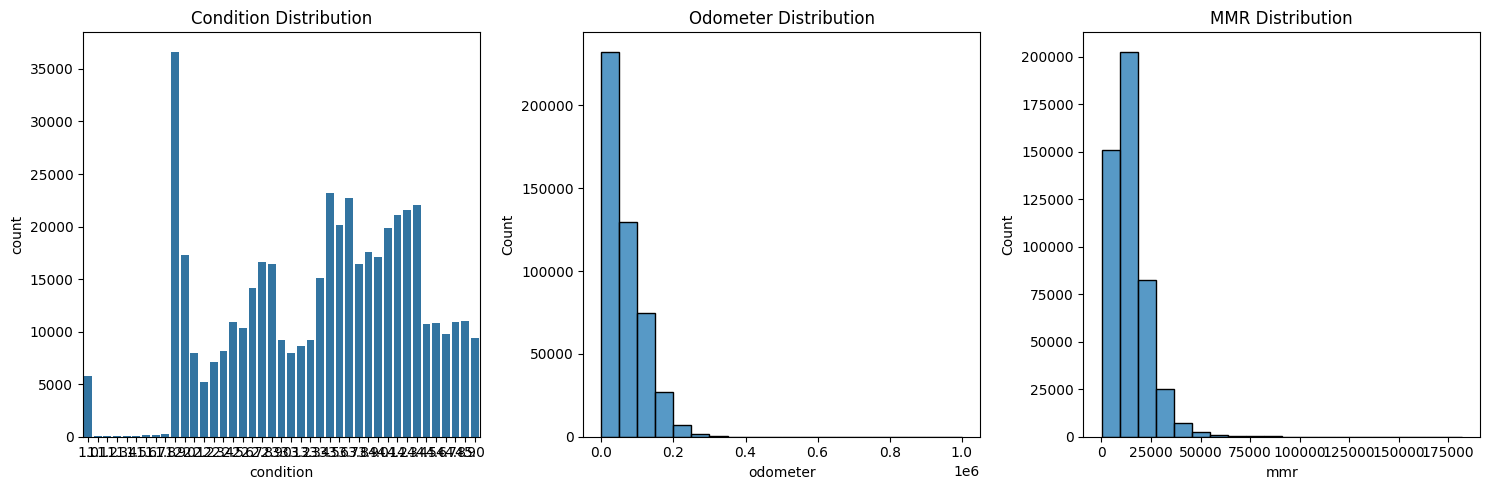

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a 1x3 grid for subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot for 'condition'
sns.countplot(x='condition', data=df, ax=axes[0])
axes[0].set_title('Condition Distribution')

# Plot for 'odometer'
sns.histplot(x='odometer', data=df, ax=axes[1], bins=20)
axes[1].set_title('Odometer Distribution')

# Plot for 'mmr'
sns.histplot(x='mmr', data=df, ax=axes[2], bins=20)
axes[2].set_title('MMR Distribution')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
        

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split

def train_val_test():
    
    # Define the size for each set
    train_size = 0.64
    validation_size = 0.16
    test_size = 0.20

    # Split the data into training and temp sets
    train_data, temp_data = train_test_split(df, test_size=(1 - train_size), random_state=42)

    # Split the temp set into validation and test sets
    validation_data, test_data = train_test_split(temp_data, test_size=(validation_size / (validation_size + test_size)), random_state=42)

    # Print the sizes of the sets
    print(f"Train set size: {len(train_data)}")
    print(f"Validation set size: {len(validation_data)}")
    print(f"Test set size: {len(test_data)}")

    # Now you can use train_data, validation_data, and test_data for your training, validation, and testing purposes

    return train_data, validation_data, test_data

train_data, validation_data, test_data = train_val_test()

print(train_data)


Train set size: 302295
Validation set size: 94467
Test set size: 75574
        year        make             model             trim       body  \
454582  2011      Nissan             Titan           PRO-4X   Crew Cab   
265232  2004  Volkswagen        New Beetle         GLS 1.8T  Hatchback   
370173  2012        FIAT               500            Sport  Hatchback   
324108  2013  Volkswagen            Tiguan               SE        SUV   
217082  2012       Honda            Accord             LX-P      Sedan   
...      ...         ...               ...              ...        ...   
310021  2012      Nissan            Altima            2.5 S      Sedan   
433034  2006        Ford  F-350 Super Duty           Lariat   Crew Cab   
164717  2013    Infiniti           G Sedan             G37x    G Sedan   
181922  2006        Ford            Fusion              SEL      Sedan   
153201  2011        Jeep          Wrangler  Unlimited Sport        SUV   

       transmission                vin s

In [52]:
from sklearn.preprocessing import LabelEncoder

# We will now standarize the categorical columns so we can use them as features in out model

def standarize_Data (train_data):

    # Apply one-hot encoding to the 'transmission' column
    train_data_encoded = pd.get_dummies(train_data, columns=['transmission'], prefix='transmission')

    # Print the resulting DataFrame
    train_data_encoded.head()

    return train_data_encoded


def standarize_Data_Other_Values (column):
    # Get value counts for the 'Category' column
    #We have to do this for every column
    value_counts = df[column].value_counts()

    print(value_counts)

    # Identify values that appear more than 50 times
    frequent_values = value_counts[value_counts > 50].index

    # Create a new column for each frequent value
    for value in frequent_values:
        df[f'Category_{value}'] = (df['Category'] == value).astype(int)

    # Create a column for less frequent values
    df['Category_Other'] = df['Category'].apply(lambda x: x if x in frequent_values else 'Other')

    # Drop the original 'Category' column
    df.drop('Category', axis=1, inplace=True)

    # Convert the 'Other' column to one-hot encoding
    df = df.get_dummies(df, columns=['Category_Other'])

    print(df)

standarize_Data(train_data)


,year,make,model,trim,body,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,transmission_automatic,transmission_manual
454582,2011,Nissan,Titan,PRO-4X,Crew Cab,1n6aa0ec4bn309008,oh,4.2,63661.0,black,gray,pauley motor car co preowned vehicles llc,21200,21800,Tue May 26 2015 02:30:00 GMT-0700 (PDT),True,False
265232,2004,Volkswagen,New Beetle,GLS 1.8T,Hatchback,3vwcd31c74m413948,md,2.8,175370.0,blue,black,carbiz,1725,1900,Tue Feb 10 2015 01:30:00 GMT-0800 (PST),True,False
370173,2012,FIAT,500,Sport,Hatchback,3c3cffbr0ct383198,pa,3.6,24030.0,green,brown,battlefield kia,9175,9100,Fri Feb 27 2015 01:00:00 GMT-0800 (PST),False,True
324108,2013,Volkswagen,Tiguan,SE,SUV,wvgav3ax4dw568592,fl,4.3,24981.0,blue,tan,paradise ford,17700,20800,Tue Feb 17 2015 01:30:00 GMT-0800 (PST),True,False
217082,2012,Honda,Accord,LX-P,Sedan,1hgcp2f45ca038614,pa,3.2,33494.0,gray,gray,"ahfc/honda lease trust/hvt, inc. eot",13000,13000,Fri Jan 30 2015 01:00:00 GMT-0800 (PST),True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310021,2012,Nissan,Altima,2.5 S,Sedan,1n4al2ap3cc217022,nj,4.6,32885.0,white,black,nissan-infiniti lt,12200,12500,Wed Feb 18 2015 01:30:00 GMT-0800 (PST),True,False
433034,2006,Ford,F-350 Super Duty,Lariat,Crew Cab,1ftww31p76eb31749,mn,1.9,187302.0,—,gray,ford-lincoln dealer program,9900,8000,Wed May 20 2015 03:00:00 GMT-0700 (PDT),True,False
164717,2013,Infiniti,G Sedan,G37x,G Sedan,jn1cv6ar5dm760473,la,4.1,39710.0,white,black,the hertz corporation,20300,20000,Wed Feb 11 2015 03:00:00 GMT-0800 (PST),True,False
181922,2006,Ford,Fusion,SEL,Sedan,3fahp08116r140875,nc,2.5,163172.0,beige,black,dt credit corporation,2475,2500,Tue Feb 03 2015 01:30:00 GMT-0800 (PST),True,False
